In [1]:
# Elasticity: -mu*div(grad(u)+grad(u)^T) - lam*grad(div u) = f; u is vector field
# on unit square
# boundary condition: Traction force sigma =0



from ngsolve import *
from netgen.geom2d import *
from ngsolve.webgui import Draw

import numpy as np
import matplotlib.pyplot as plt

################################### input PDE model #########################################
mu, lam = 1, 1 

f_body = CoefficientFunction((0,0))                # in R^2
f_traction = CoefficientFunction((0,0))            # = sigma(u).n  => in R^2
                                                   # CoefFunc in 2D, access 2 components by: f_body[0] or [1]
                                                   # unlike GridFunc, access by gfu.components[0] or [1]

#test
f_body = CoefficientFunction((-6*(y**2-y)-2*(x**2-x),-2*(2*x-1)*(2*y-1))) 
f_traction = CoefficientFunction((0, 0)) 

u_ext = CoefficientFunction((x*(x-1)*y*(y-1),0))
        
################################### FE solver #############################################

# generate a triangular mesh of mesh-size h, order k
h = 0.1
k = 2
mesh = Mesh(unit_square.GenerateMesh(maxh=h))

# H1-finite element space for vector field
fes = VectorH1(mesh, order=k, dirichlet="left|top|bottom|right")

print ("FE: type, order, #dofs =", fes.type,fes.globalorder,fes.ndof)

# define symbolic trial- and test-functions
u,v = fes.TnT()

# the right hand side. Not forget *v if performing assembly step
# Method: InnerProduct : for Frobenius and Inner products
# Call: CoefficientFunction((f1,f2)) : CF 2d-vector coefficient function     

f = LinearForm(fes)                
f +=  InnerProduct(f_body,v)*dx + InnerProduct(f_traction,v)*ds
f.Assemble()    # Assembly step



# the bilinear-form. Not forget *v
a = BilinearForm(fes, symmetric=True)
a += ( mu*InnerProduct(grad(u)+grad(u).trans, grad(v)) + lam*div(u)*div(v)  )*dx
#a += ( InnerProduct( mu*(grad(u)+grad(u).trans) +lam*div(u)*Id(mesh.dim), grad(v))  )*dx        # alternative form
a.Assemble()     # Assembly step


# the computed solution 
gfu = GridFunction(fes)
gfu.vec.data = a.mat.Inverse(fes.FreeDofs())* f.vec

# plot exact, omputed solution (Draw works in netgen-gui, jupyter only)
Draw (u_ext[0],mesh,'u_ext')
Draw (u_ext[1],mesh,'u_ext')

Draw (gfu.components[0])
Draw (gfu.components[1])
#Draw (-grad(gfu), mesh, "Flux")

Draw (gfu.components[0]-u_ext[0],mesh)
Draw (gfu.components[1]-u_ext[1],mesh)
print ("L2-error =", sqrt( Integrate(np.square(gfu.components[0]-u_ext[0])+np.square(gfu.components[1]-u_ext[1]), mesh)))


# plot on regular grid y-slice
#ys = 0.25
#px = [0.1*i for i in range(11)]
#val_uext = [u_ext(mesh(p,ys)) for p in px]
#val_ufe = [gfu(mesh(p,ys)) for p in px]
#plt.plot(px,val_uext,'*',px,val_ufe)
#plt.title('y-slice at y='+str(ys))
#plt.show()


# command: help(xxx) : to see vars, methods, attributes xxx
#help(gfu)
#print ('u_fe =',gfu.vec)   # or dfu.vec.data
#help(u_ext)
#print('info about u_ext :',u_ext.real)

FE: type, order, #dofs = VectorH1 2 1002


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

L2-error = 1.1365376892208102e-05


In [90]:
# Elasticity: -mu*div(grad(u)+grad(u)^T) - lam*grad(div u) = f; u is vector field
# on unit square
# boundary condition: Traction force sigma on top 



from ngsolve import *
from netgen.geom2d import *
from ngsolve.webgui import Draw

import numpy as np
import matplotlib.pyplot as plt

################################### input PDE model #########################################
mu, lam = 1, 1 

f_body = CoefficientFunction((0,0))                # in R^2
f_traction = CoefficientFunction((0,2))            # = sigma(u).n  => in R^2
                                                   # CoefFunc in 2D, access 2 components by: f_body[0] or [1]
                                                   # unlike GridFunc, access by gfu.components[0] or [1]

#test
f_body = CoefficientFunction((-6*y,-(4*x-2))) 
f_traction = CoefficientFunction((x**2-x,2*x-1)) 


u_ext = CoefficientFunction((x*(x-1)*y,0))

#sigma = Id(2)*4
#print(sigma(mesh()))
#f_traction[0].Set((0,2), definedon=mesh.Boundaries("left"))
        
################################### FE solver #############################################

# generate a triangular mesh of mesh-size h, order k
h = 0.1
k = 3
mesh = Mesh(unit_square.GenerateMesh(maxh=h))

# H1-finite element space for vector field
fes = VectorH1(mesh, order=k, dirichlet="left|right|top|bottom")
#test
fes = VectorH1(mesh, order=k, dirichlet="left|right|bottom")

print ("FE: type, order, #dofs =", fes.type,fes.globalorder,fes.ndof)

# define symbolic trial- and test-functions
u,v = fes.TnT()

# the right hand side. Not forget *v if performing assembly step
# Method: InnerProduct : for Frobenius and Inner products
# Call: CoefficientFunction((f1,f2)) : CF 2d-vector coefficient function     

f = LinearForm(fes)                
f +=  InnerProduct(f_body,v)*dx + InnerProduct(f_traction,v)*ds
f.Assemble()    # Assembly step
#print(f.vec)



# the bilinear-form. Not forget *v
a = BilinearForm(fes, symmetric=True)
a += ( mu*InnerProduct(grad(u)+grad(u).trans, grad(v)) + lam*div(u)*div(v) )*dx
#a += ( InnerProduct( mu*(grad(u)+grad(u).trans) +lam*div(u)*Id(mesh.dim), grad(v))  )*dx        # alternative form
a.Assemble()     # Assembly step


# the computed solution 
gfu = GridFunction(fes)
gfu.vec.data = a.mat.Inverse(fes.FreeDofs())* f.vec

# plot exact, omputed solution (Draw works in netgen-gui, jupyter only)
Draw (u_ext[0],mesh,'u_ext')
Draw (u_ext[1],mesh,'u_ext')

Draw (gfu.components[0])
Draw (gfu.components[1])
#Draw (-grad(gfu), mesh, "Flux")

Draw (gfu.components[0]-u_ext[0],mesh)
Draw (gfu.components[1]-u_ext[1],mesh)
print ("L2-error =", sqrt( Integrate(np.square(gfu.components[0]-u_ext[0])+np.square(gfu.components[1]-u_ext[1]), mesh)))


# plot on regular grid y-slice
#ys = 0.25
#px = [0.1*i for i in range(11)]
#val_uext = [u_ext(mesh(p,ys)) for p in px]
#val_ufe = [gfu(mesh(p,ys)) for p in px]
#plt.plot(px,val_uext,'*',px,val_ufe)
#plt.title('y-slice at y='+str(ys))
#plt.show()


# command: help(xxx) : to see vars, methods, attributes xxx
#help(gfu)
#print ('u_fe =',gfu.vec)   # or dfu.vec.data
#help(u_ext)
#print('info about u_ext :',u_ext.real)




FE: type, order, #dofs = VectorH1 3 2192


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.22…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.22…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.22…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.22…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.22…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.22…

L2-error = 2.4425296759924233e-16


FE: type, order, #dofs = VectorH1 5 5952


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

L2-error = 0.5704768937804968


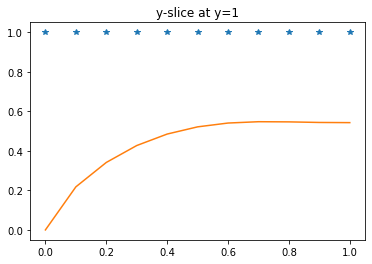

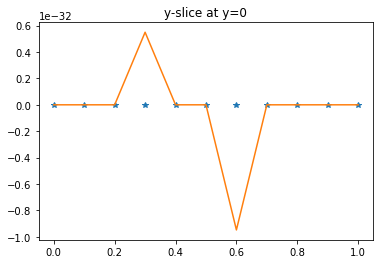

In [2]:
##### THIS EX IS TESTING! NOT FINAL!!!

# Elasticity: -mu*div(grad(u)+grad(u)^T) - lam*grad(div u) = f; u is vector field
# on unit square
# boundary condition: Traction force sigma on boundary 



from ngsolve import *
from netgen.geom2d import *
from ngsolve.webgui import Draw

import numpy as np
import matplotlib.pyplot as plt


# generate a triangular mesh of mesh-size h, order k
h = 0.1
k = 5
mesh = Mesh(unit_square.GenerateMesh(maxh=h))

# H1-finite element space for vector field
#fes = VectorH1(mesh, order=k, dirichlet="left|right|top|bottom")
#test
fes = VectorH1(mesh, order=k, dirichlet="left|bottom")

print ("FE: type, order, #dofs =", fes.type,fes.globalorder,fes.ndof)

################################### input PDE model #########################################
mu, lam = 1, 1 

f_body = CoefficientFunction((0,0))                # in R^2
f_traction = CoefficientFunction((0,0))            # = sigma(u).n  => in R^2
                                                   # CoefFunc in 2D, access 2 components by: f_body[0] or [1]
                                                   # unlike GridFunc, access by gfu.components[0] or [1]

#test different boundary traction force
f_body = CoefficientFunction((0,0)) 

f_traction_right = CoefficientFunction((0,2)) 
#f_traction_left = CoefficientFunction((0,-2)) 
f_traction_top = CoefficientFunction((2,0)) 
#f_traction_bottom = CoefficientFunction((-2,0))

# equivalent, but not yet work well! need to check further!
#f_traction = CoefficientFunction([(2,0) if bc=="right" else (-2,0) if bc=="left" else (0,-2) if bc=="top" else (0,2) for bc in mesh.GetBoundaries()])


u_ext = CoefficientFunction((y,x))


#sigma = Id(2)*4
#print(sigma(mesh()))
#f_traction[0].Set((0,2), definedon=mesh.Boundaries("left"))
        
################################### FE solver #############################################


# define symbolic trial- and test-functions
u,v = fes.TnT()

# the right hand side. Not forget *v if performing assembly step
# Method: InnerProduct : for Frobenius and Inner products
# Call: CoefficientFunction((f1,f2)) : CF 2d-vector coefficient function     

f = LinearForm(fes)                
f +=  InnerProduct(f_body,v)*dx     

f +=   InnerProduct(f_traction_top,v)*ds("top")          # ("bc") specify which boundary. See Solid Mechanic   
#f +=   InnerProduct(f_traction_bottom,v)*ds("bottom")
#f +=   InnerProduct(f_traction_left,v)*ds("left")
f +=   InnerProduct(f_traction_right,v)*ds("right")


f.Assemble()    # Assembly step
#print(f.vec)



# the bilinear-form. Not forget *v
a = BilinearForm(fes, symmetric=True)
a += ( mu*InnerProduct(grad(u)+grad(u).trans, grad(v)) + lam*div(u)*div(v) )*dx
#a += ( InnerProduct( mu*(grad(u)+grad(u).trans) +lam*div(u)*Id(mesh.dim), grad(v))  )*dx        # alternative form
a.Assemble()     # Assembly step


# the computed solution 
gfu = GridFunction(fes)
gfu.vec.data = a.mat.Inverse(fes.FreeDofs())* f.vec

# plot exact, computed solution (Draw works in netgen-gui, jupyter only)
Draw (u_ext[0],mesh,'u_ext')
Draw (u_ext[1],mesh,'u_ext')

Draw (gfu.components[0])
Draw (gfu.components[1])
#Draw (-grad(gfu), mesh, "Flux")

Draw (gfu.components[0]-u_ext[0],mesh)
Draw (gfu.components[1]-u_ext[1],mesh)
print ("L2-error =", sqrt( Integrate(np.square(gfu.components[0]-u_ext[0])+np.square(gfu.components[1]-u_ext[1]), mesh)))


# plot on regular grid y-slice
ys = 1
px = [0.1*i for i in range(11)]
val_uext = [u_ext(mesh(p,ys))[0] for p in px]
val_ufe = [gfu(mesh(p,ys))[0]  for p in px]
plt.plot(px,val_uext,'*',px,val_ufe)
plt.title('y-slice at y='+str(ys))
plt.show()

ys = 0
px = [0.1*i for i in range(11)]
val_uext = [u_ext(mesh(p,ys))[0] for p in px]
val_ufe = [gfu(mesh(p,ys))[0]  for p in px]
plt.plot(px,val_uext,'*',px,val_ufe)
plt.title('y-slice at y='+str(ys))
plt.show()



# command: help(xxx) : to see vars, methods, attributes xxx
#help(gfu)
#print ('u_fe =',gfu.vec)   # or dfu.vec.data
#help(u_ext)
#print('info about u_ext :',u_ext.real)


